In [1]:
#Classify data from DB here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('data.csv', header = None)
# df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]
# df = df.drop("class", axis = 1)
# df.to_csv("noclass.csv", index = False, header=False)

df = pd.read_csv('noclass.csv')

labels = []
for i in df.index:
    lightState = int(df.iloc[i,5])
    airconState = int(df.iloc[i,6])
    if airconState == 0 and lightState == 0:
        label = "nanl"
    elif airconState == 0 and lightState == 1:
        label = "nagl"
    elif airconState == 1 and lightState == 0: 
        label = "ganl"
    elif airconState == 1 and lightState == 1:
        label = "gagl"
    labels.append(label)

df.insert(9,"class", labels, True)

df.to_csv("post.csv", index = False)


In [2]:

df = pd.read_csv('post.csv', header= None)
#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

# tentatively reduced to 5 features for POC
y = df['class']
X = df.drop('class', axis =1)
# X = X.drop('hour', axis = 1)
X = X.drop('minute', axis = 1)
X = X.drop('light_state', axis = 1)
X = X.drop('aircon_state', axis = 1)
X = X.drop('aircon_temp', axis = 1)
X = X.drop('room', axis = 1)
X = X.drop('humidity', axis = 1)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [4]:
from sklearn import tree
from sklearn.metrics import accuracy_score

testNeighbors = [1,3,5,7,9,11,13,15,17,19,21,31,41,51,61,71,81,91,101,201,265]
error = []
trainAcc = []
testAcc = []

# Calculating error for K values between 1 and 265
for i in testNeighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    Y_predTrain = knn.predict(X_train)
    Y_predTest = knn.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

Text(0, 0.5, 'Accuracy')

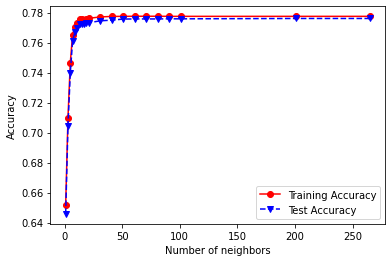

In [5]:
plt.plot(testNeighbors, trainAcc, 'ro-', testNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [9]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

import pickle
knnPickle = open('knnPrediction', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)  
knnPickle.close()
# load the model from disk
loaded_model = pickle.load(open('knnPrediction', 'rb'))
result = loaded_model.predict(X_test)
print(result)

[[    7  1125  1067    32]
 [   14 10150   126   306]
 [   68   201  9476    26]
 [   13  1942  1094   158]]
              precision    recall  f1-score   support

        gagl       0.07      0.00      0.01      2231
        ganl       0.76      0.96      0.85     10596
        nagl       0.81      0.97      0.88      9771
        nanl       0.30      0.05      0.08      3207

    accuracy                           0.77     25805
   macro avg       0.48      0.50      0.45     25805
weighted avg       0.66      0.77      0.69     25805

['nagl' 'ganl' 'nagl' ... 'ganl' 'ganl' 'nagl']


# Do a check for accuracy "if" statement before saving model